## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
url = "https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz"
df = pd.read_csv(url)


In [2]:
print(f"The dataframe contains {df.shape[0]} articles.")

The dataframe contains 30165 articles.


<Axes: xlabel='count', ylabel='category'>

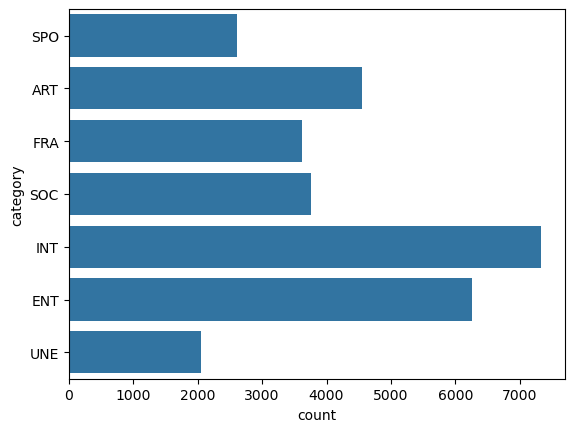

In [3]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=df, y='category')

In [4]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)

print("Example of articles :")
pd.DataFrame.sample(df, n=4)

Example of articles :


,text,category
21825,pas plus en allemagne qu'en france les services secrets n'aiment voir étalés sur la place publique leurs échecs ni même souvent leurs succès les services allemands du bundesnarichtendienst bnd préfèrent donc ne pas dévoiler le rôle qu'ils ont joué dans la récente libération des otages européens enlevés par des islamistes algériens ni raconter leur intervention dans la restitution de deux corps de combattants du hezbollah remis lundi 25 août par israël via le comité international de la croix-rouge cicr à l'organisation libanaise de cheikh nasrallah les deux corps sont ceux de hassan zaatar et d'ammar hammoud deux membres de la milice chiite tués en opérations dans les années 1990 alors qu'israël occupait encore le sud du liban après une courte prière et un bref discours leurs restes contenus dans deux cercueils recouverts du drapeau jaune du hezbollah ont été emmenés par deux ambulances pour être remis à leurs familles les corps des combattants avaient été emmenés en israël pour être échangés contre ceux de soldats israéliens morts au liban ou contre d'éventuels prisonniers toujours vivants plusieurs échanges de ce type ont déjà eu lieu depuis des années israël cherche à savoir ce qu'est devenu l'un de ses pilotes le navigateur ron arad abattu au liban en 1986 et présumé mort c'est pour obtenir sa libération ou la restitution de son corps que l'etat juif au cours des ans avait enlevé au liban plusieurs responsables ou miliciens du hezbollah dont en 1989 le cheik karim obeid ce dernier a vainement tenté d'obtenir sa libération en faisant appel à la cour suprême israélienne la restitution d'hier s'inscrit dans le cadre d'un autre dossier celui de trois soldats israéliens enlevés par le hezbollah en octobre 2000 alors qu'ils patrouillaient sur la frontière israélo-libanaise dans le secteur controversé dit des fermes de chebaa depuis la même période le hezbollah détient également elhanan tannenbaum homme d'affaires et colonel de réserve de l'armée de l'air israélienne considéré comme un espion israélien par le hezbollah et attiré au liban dans des conditions mystérieuses malgré la tension israélo-libanaise de ces dernières semaines ponctuée par des échanges d'artillerie un adolescent de 16 ans est mort dans le village israélien de schlomi des survols aériens et des mises en garde tant américaines qu'israéliennes en direction du hezbollah et de la syrie réputée lui accorder sa protection la négociation en coulisses pour un échange de prisonniers n'a pas cessé la confiance des deux parties comme au poker israël a remis deux corps pour voir en échange le hezbollah pour la première fois a permis à un intermédiaire allemand de rencontrer elhanan tannenbaum qui selon la télévision israélienne est en bonne santé berlin refuse de s'étendre sur son intervention qui pourrait ouvrir la voie à un échange plus vaste depuis plusieurs années déjà sous le gouvernement kohl rappelle un de ses fonctionnaires l'allemagne par l'intermédiaire de ses services secrets joue un rôle de médiation pour faciliter certaines actions humanitaires dans la région plusieurs fois notre ministre des affaires étrangères ou le président de la république ont rencontré les familles des prisonniers israéliens leur promettant de faire le maximum pour débloquer le dossier ajoute-t-il la raison de la confiance que leur vouent les deux parties pour des raisons évidentes nous sommes des amis d'israël et compte tenu de notre histoire dans la région le hezbollah ne nous soupçonne pas d'arrière-pensées,INT
18472,anna lindh se promenant à pied sans garde du corps dans le centre de stockholm la scène aurait de quoi surprendre ailleurs qu'en scandinavie surtout à quatre jours d'une échéance électorale décisive pourtant personne en suède ne semblait s'étonner de croiser la ministre des affaires étrangères ou un autre membre du gouvernement arpentant seul les trottoirs de la capitale on continuait juste son chemin sans se retourner comme imperceptiblement rassuré 

Category: ENT


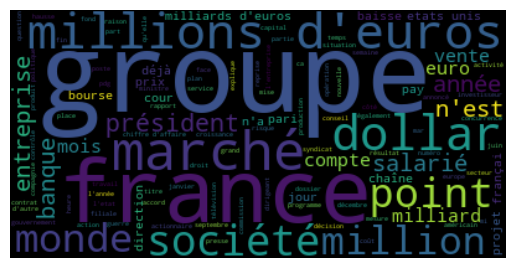

Category: INT


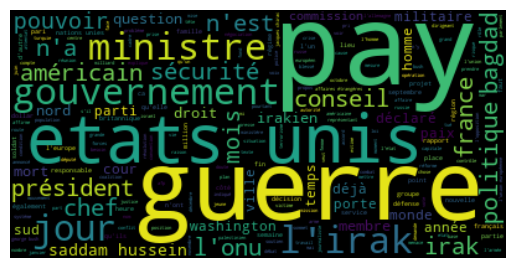

Category: ART


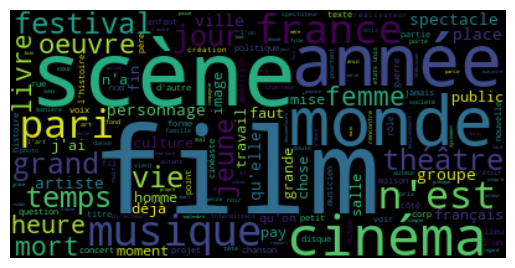

Category: SOC


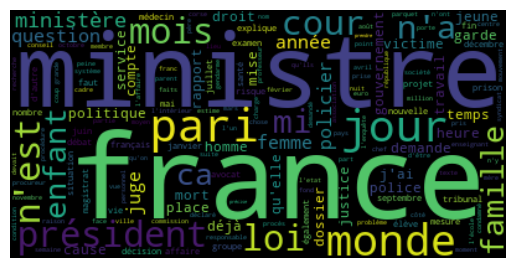

Category: FRA


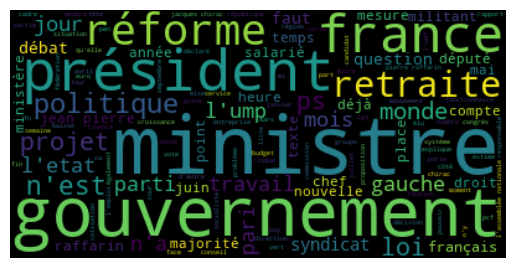

In [5]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    text = df[df.category == cat].iloc[:,0].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)
    print(f"Category: {cat}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size

df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2)
df_dev, df_test = train_test_split(df_test, train_size=0.5, test_size=0.5)

X_train = df_train.iloc[:,0]
y_train = df_train.iloc[:,1]

X_dev = df_dev.iloc[:,0]
y_dev = df_dev.iloc[:,1]

X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,1]

print(f"Size of the train set: {X_train.shape[0]}.")
print(f"Size of the dev set: {X_dev.shape[0]}.")
print(f"Size of the test set: {X_test.shape[0]}.")

Size of the train set: 24132.
Size of the dev set: 3016.
Size of the test set: 3017.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier

# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_counts, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_counts, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_counts, y_dev))
print("Accuracy on the test set:", clf.score(X_test_counts, y_test))

Accuracy on the train set: 0.7264213492458147
Accuracy on the dev set: 0.745026525198939
Accuracy on the test set: 0.7225720914816043


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

# Create a TF-IDF representation with l2 norm
tf_transformer = TfidfTransformer(norm='l2').fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# Train a MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_tf, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_tf, y_dev))
print("Accuracy on the test set:", clf.score(X_test_tf, y_test))

Accuracy on the train set: 0.7424995856124648
Accuracy on the dev set: 0.756631299734748
Accuracy on the test set: 0.736824660258535


The test error rate is 25%.

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_test = clf.predict(X_test_tf)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

         ART       0.75      0.87      0.81       480
         ENT       0.74      0.84      0.79       597
         FRA       0.62      0.72      0.67       367
         INT       0.76      0.86      0.80       739
         SOC       0.69      0.56      0.62       385
         SPO       0.91      0.75      0.82       246
         UNE       0.50      0.00      0.01       203

    accuracy                           0.74      3017
   macro avg       0.71      0.66      0.65      3017
weighted avg       0.72      0.74      0.71      3017



Arts ('ART'), international ('INT') and sports ('SPO') have the best scores. International is the class with the most observations so it makes sense that the classifier is more accurate. Sports have less observations but it could be link to international vocabulary. On the contrary, front page articles ('UNE') have very low scores, and also few observations.

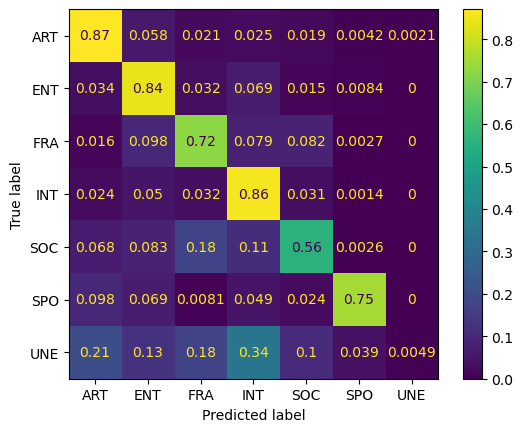

In [11]:
# confusion matrix normalized by lines
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

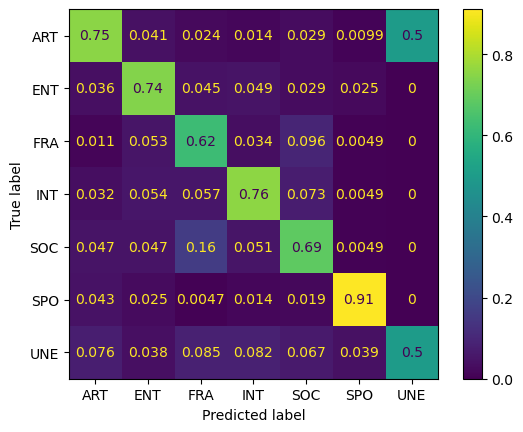

In [12]:
# confusion matrix normalized by column
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_, normalize='pred')
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Front page articles ('UNE') is the more confused class (only 0.5% of observations are correctly classified), which makes sense since it has few observations (which are also probably shorter in terms of number of words). The most frequent predicted label for front page articles is international (35% of observations). A lot of front page articles are also classified as arts, entreprise and France.
France ('FRA') and society ('SOC') are also rather confused, with only 68% and 64% (resp.) of observations correctly classified. 12% of France articles are classified as society articles, and 11% as entreprises. Inversely, 14% of society articles are classified as France. This could be that France and society articles tend to adress the same subjects and use the same words.

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

/tmp/ipykernel_925/1760837603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update['category'] = df_update['category'].replace({'SOC' : 'SOC_FRA', 'FRA' : 'SOC_FRA'})


Size of the train set: 22488.
Size of the dev set: 2811.
Size of the test set: 2811.


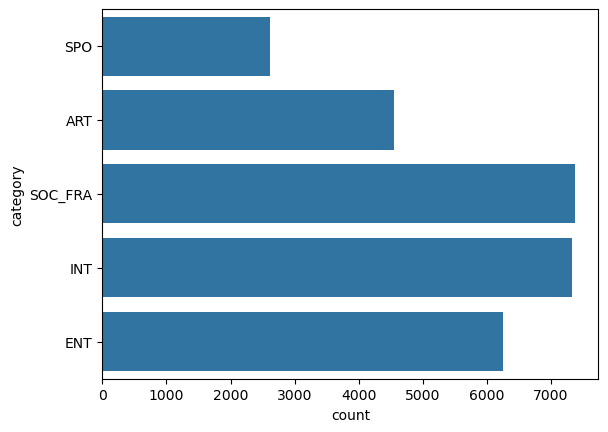

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter out the UNE class
df_update = df[df.category != 'UNE']

# Merge 'FRA' and 'SOC'
df_update['category'] = df_update['category'].replace({'SOC' : 'SOC_FRA', 'FRA' : 'SOC_FRA'})

# Plot the statistics of classes
sns.countplot(data=df_update, y='category')

# Make the splits and print the sizes for checking
df_train, df_test = train_test_split(df_update, train_size=0.8, test_size=0.2)
df_dev, df_test = train_test_split(df_test, train_size=0.5, test_size=0.5)

X_train = df_train.iloc[:,0]
y_train = df_train.iloc[:,1]

X_dev = df_dev.iloc[:,0]
y_dev = df_dev.iloc[:,1]

X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,1]

print(f"Size of the train set: {X_train.shape[0]}.")
print(f"Size of the dev set: {X_dev.shape[0]}.")
print(f"Size of the test set: {X_test.shape[0]}.")


Accuracy on the train set: 0.8379135538954109
Accuracy on the dev set: 0.8217716115261473
Accuracy on the test set: 0.8441835645677694


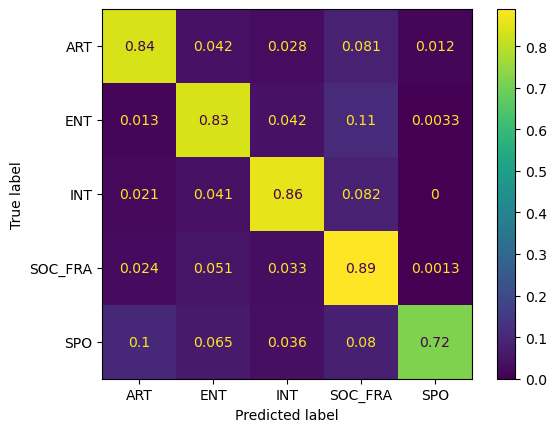

In [14]:
# Count document vectors
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

# Apply TfidfVectorizer
tf_transformer = TfidfTransformer(norm='l2').fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# Train a MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Predictions
y_pred_test = clf.predict(X_test_tf)

# Print accuracy 
print("Accuracy on the train set:", clf.score(X_train_tf, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_tf, y_dev))
print("Accuracy on the test set:", clf.score(X_test_tf, y_test))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Accuracy is much higher. 

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [16]:
!pip install transformers datasets evaluate accelerate
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 42.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 91.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 60.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 81.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 82.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 86.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/

We choose the following model: mDeBERTa-v3-base-xnli-multilingual-nli-2mil7. 
It is in fact suitable for zero-shot classification that works on French text, and it is widely used.

For the classes to be predicted, we kept full labels.

In [30]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "MoritzLaurer/mDeBERTa-v3-base-mnli-xnli"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

classifier = pipeline("zero-shot-classification", model=model, tokenizer=tokenizer)

candidate_labels = ["entreprises", "international", "arts", "société", "sports", "livres", "télévision"]

sequence_to_classify = df_update.iloc[1,0]

result = classifier(sequence_to_classify,candidate_labels=candidate_labels, multi_label=False)

print(f"label: {result['labels'][0]}, with score: {round(result['scores'][0],4)}")
print(f"True label: {df_update.iloc[1,1]}")

Device set to use cpu


label: télévision, with score: 0.5831


In [ ]:
# A essayer sur 100 articles (100 premiers caractères) et comparer les résultats